In [77]:
%run helpers.py
%run helpers1.py
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 15,6


In [21]:
credit1=pd.read_csv('./creditbankdata/credit-default.csv')

In [22]:
df_credit=pd.read_csv('./german_credit_data.csv')

In [23]:
df_credit.info()
df_credit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [24]:
#Looking unique values
print(df_credit.nunique())


Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64


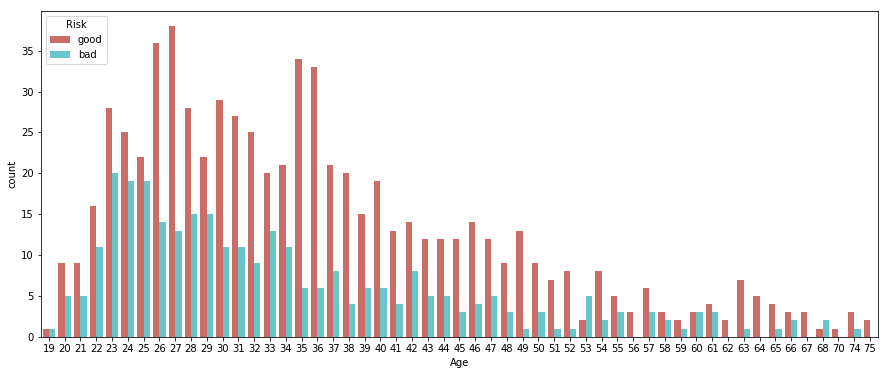

In [27]:
sns.countplot(x="Age", data=df_credit, palette="hls", hue = "Risk")
plt.show()

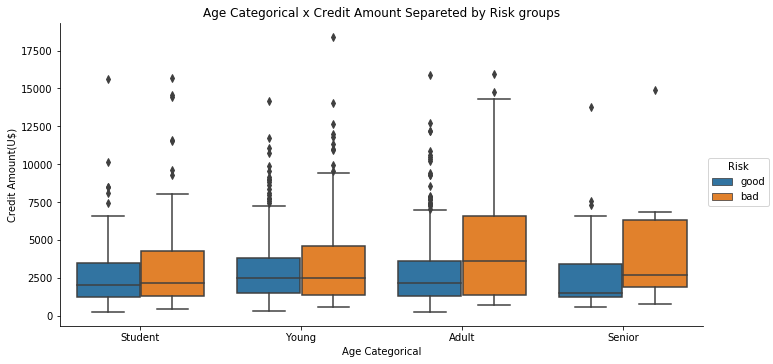

In [40]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)

ax = sns.factorplot(x="Age_cat", y="Credit amount", data=df_credit, kind="box",size=5, aspect=2,hue="Risk")
ax.set(xlabel='Age Categorical', ylabel='Credit Amount(U$)',title="Age Categorical x Credit Amount Separeted by Risk groups")
plt.show()

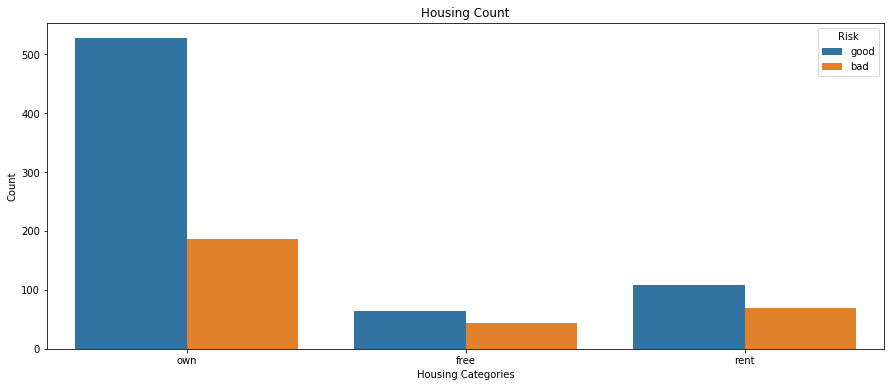

In [39]:
ax = sns.countplot(x="Housing", data=df_credit, hue = "Risk")
ax.set(xlabel='Housing Categories', ylabel='Count',title="Housing Count")

plt.show()

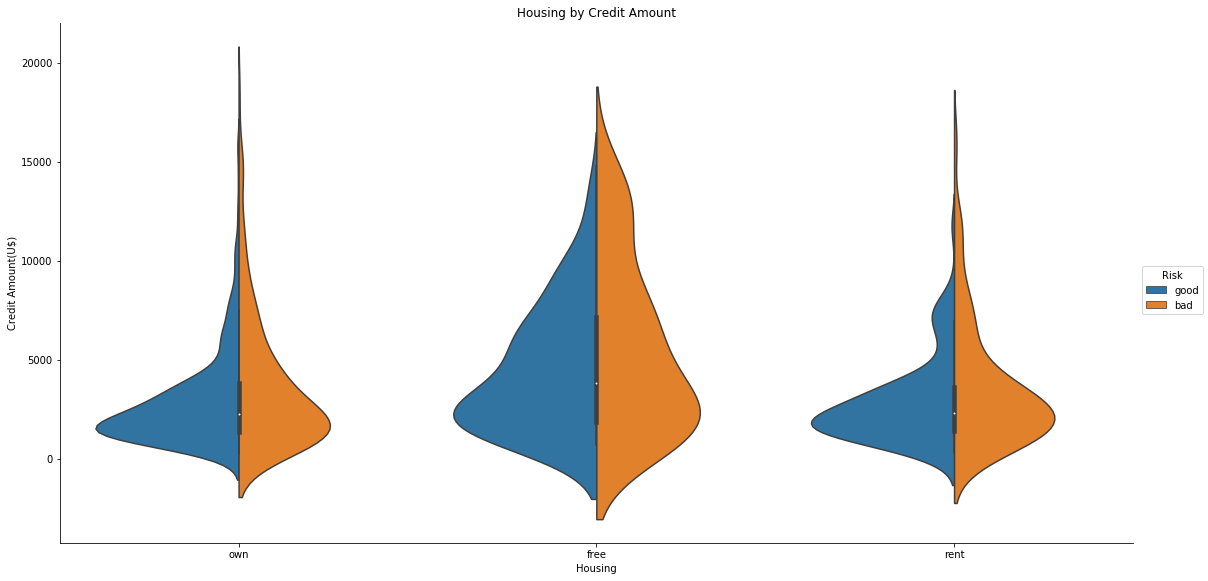

In [50]:
ax = sns.factorplot(x="Housing", y="Credit amount", data=df_credit,\
                    hue = "Risk",kind="violin",size=8,aspect=2,split=True)
ax.set(xlabel="Housing",ylabel="Credit Amount(U$)",title="Housing by Credit Amount")
plt.show()

Total difference by Sex: 
Sex
female    310
male      690
Name: Sex, dtype: int64


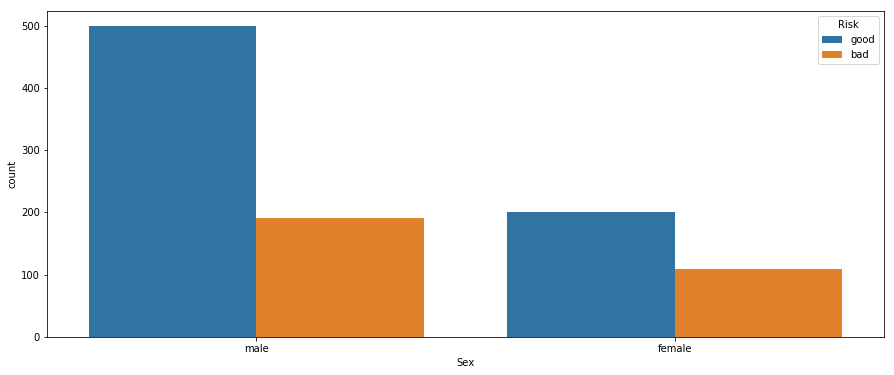

In [52]:
print("Total difference by Sex: ")
print(df_credit.groupby("Sex")["Sex"].count())
sns.countplot(x="Sex", data=df_credit, hue = "Risk")
plt.show()

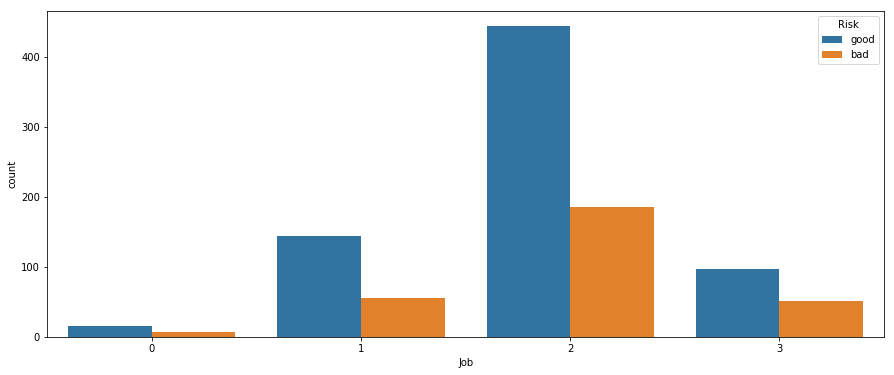

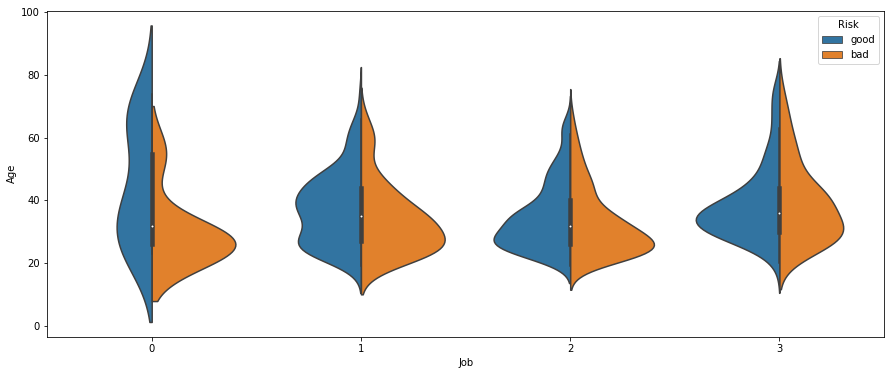

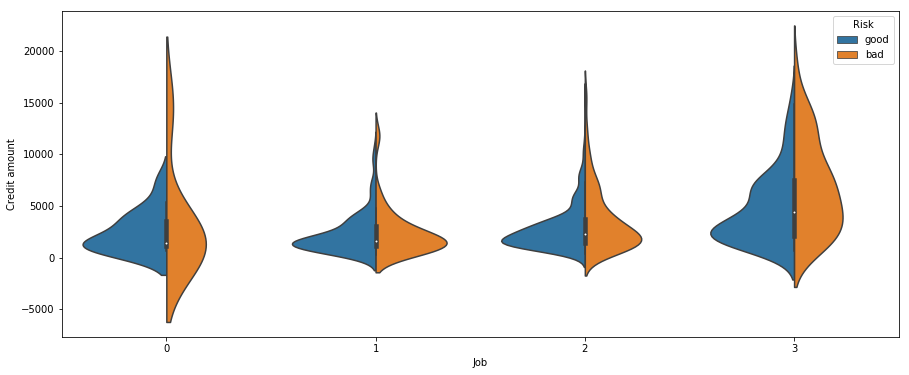

In [60]:
sns.countplot(x="Job", data=df_credit, hue="Risk")
plt.show()
sns.violinplot(x="Job", y="Age", data=df_credit,  hue="Risk", split=True)
plt.show()
sns.violinplot(x="Job", y="Credit amount", data=df_credit,  hue="Risk", split=True)
plt.show()

Description of Distribuition Saving accounts by Risk:  
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


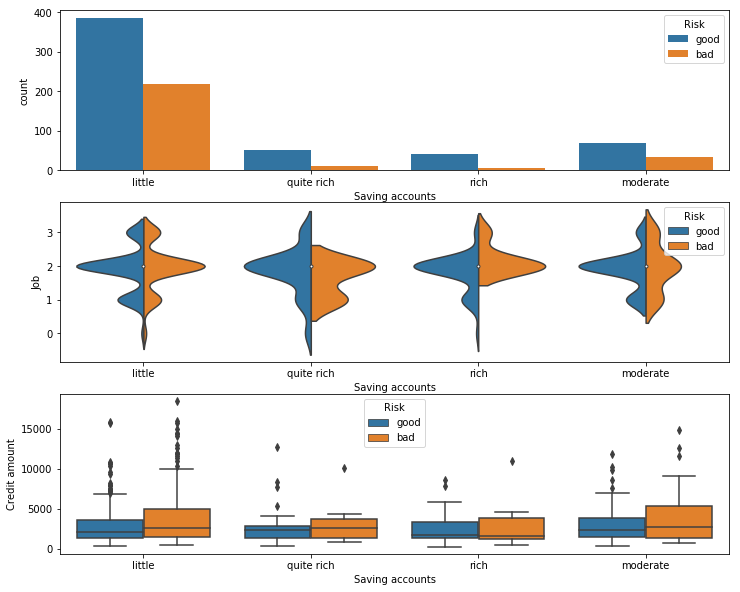

In [62]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(df_credit["Saving accounts"],df_credit.Risk))

fig, ax = plt.subplots(3,1, figsize=(12,10))
sns.countplot(x="Saving accounts", data=df_credit, ax=ax[0],hue="Risk")
sns.violinplot(x="Saving accounts", y="Job", data=df_credit, hue = "Risk", ax=ax[1],split=True)
sns.boxplot(x="Saving accounts", y="Credit amount", data=df_credit, ax=ax[2], hue = "Risk")
plt.show()

Values describe: 
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


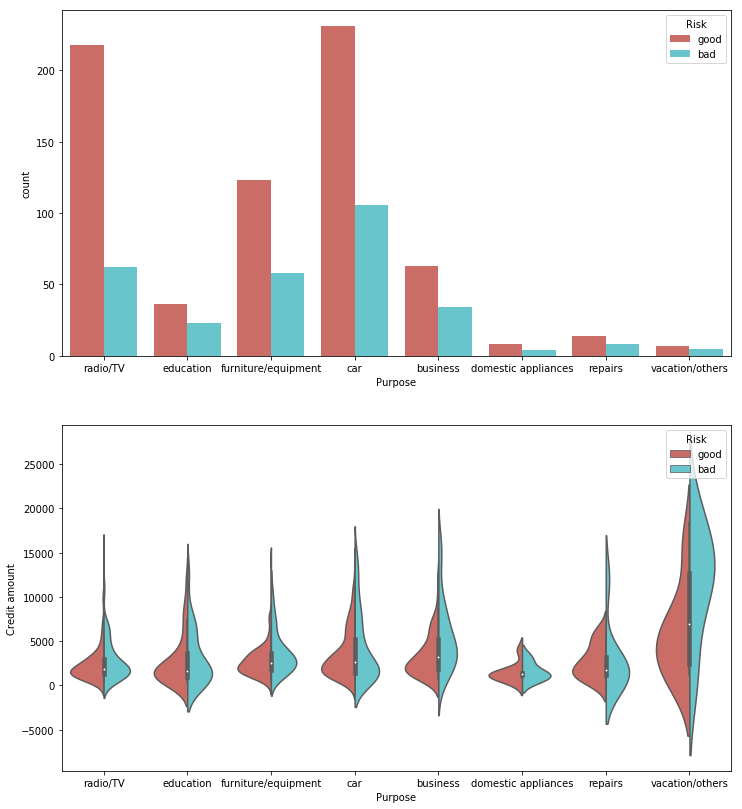

In [68]:
print("Values describe: ")
print(pd.crosstab(df_credit.Purpose, df_credit.Risk))

fig, ax = plt.subplots(2,1, figsize=(12,14))
sns.countplot(x="Purpose", data=df_credit, palette="hls", hue = "Risk",orient=45, ax=ax[0])
sns.violinplot(x="Purpose", y="Credit amount", data=df_credit, palette="hls", ax=ax[1], hue = "Risk",split=True)
plt.show()

In [70]:
df_credit.Purpose.replace(('radio/TV', 'education','furniture/equipment', 'car', 'business', 'domestic appliances','repairs','vacation/others'), (0,1,2,3,4,5,6,7), inplace=True)

df_credit.Sex.replace(('female','male'), (0,1), inplace=True)

df_credit.Housing.replace(('own','free','rent'), (0,1,2), inplace=True)

df_credit["Saving accounts"].replace((str('nan'), 'little', 'quite rich', 'rich', 'moderate'), (0,1,3,4,2), inplace=True)

df_credit.Risk.replace(('good', 'bad'),(0,1), inplace=True)

df_credit["Checking account"].replace(('little', 'moderate', 'rich'), (0,1,2), inplace=True)

df_credit["Age_cat"].replace(('Student', 'Young', 'Adult','Senior'), (0,1,2,3), inplace=True)

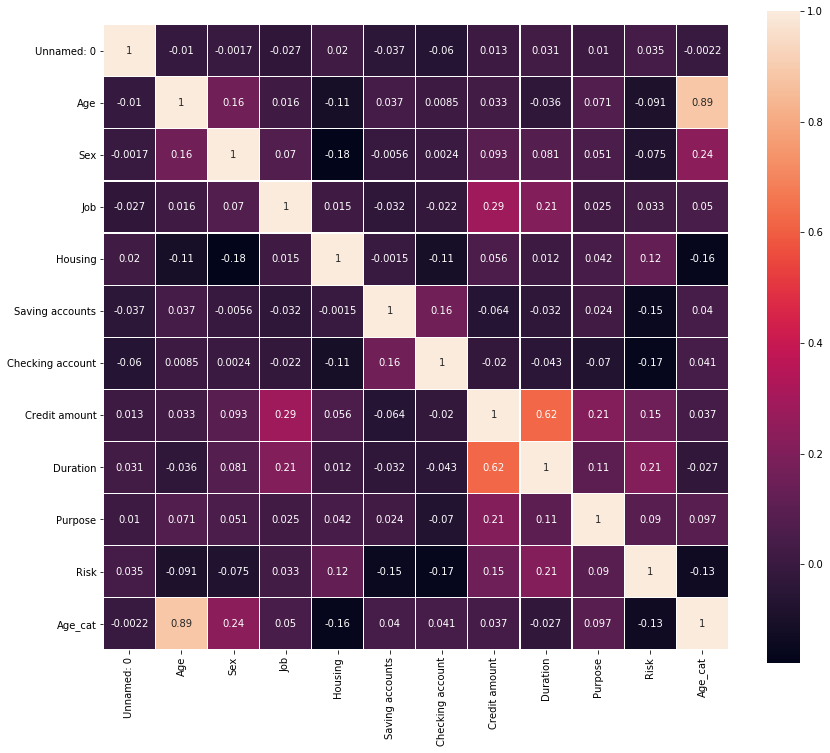

In [71]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [80]:
#Creating the X and y variables
X = df_credit.drop('Risk', 1).values
y = df_credit["Risk"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Creating the classifier
model = RandomForestClassifier(n_estimators=10, random_state=0, class_weight="balanced_subsample", )

# Running the fit
# model.fit(X_train, y_train)

# # Printing the Training Score
# print("Training score data: ")
# print(model.score(X_train, y_train))

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'